In [1]:
from fbprophet import Prophet
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
import warnings
import matplotlib.pylab as plt
from pandas import DataFrame
from io import StringIO
from datetime import date
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("D:/Data Science/Machine Learning Track/Projects/Nike_sales/Nike.xlsx")
df['Date'] = pd.to_datetime(df['Date'])  #convert the Pandas DataFrame into a time series object

In [3]:
df

,Date,Revenue
0,1999-02-28,2177
1,1999-05-31,2182
2,1999-08-31,2505
3,1999-11-30,1913
4,2000-02-28,2162
5,2000-05-31,2273
6,2000-08-31,2501
7,2000-11-30,2060
8,2001-02-28,2170
9,2001-05-31,2483


#### Renaming the columns to use inside Prophet.
* Independent variables as ds
* Dependent variable as y

In [4]:
df = df.rename(columns={"Revenue": "y","Date":"ds"})

#### Let's try fitting the model without doing any transformations

In [5]:
fc1 = Prophet(interval_width=0.95)

In [6]:
fc1.fit(df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Creating forecasting period for predictions

In [7]:
# forecasting period for next 36 months
forecast_periods = fc1.make_future_dataframe(periods = 36, include_history= True, freq="Q")

In [8]:
forecast_periods

,ds
0,1999-02-28
1,1999-05-31
2,1999-08-31
3,1999-11-30
4,2000-02-28
5,2000-05-31
6,2000-08-31
7,2000-11-30
8,2001-02-28
9,2001-05-31


In [9]:
# Prediction for forecasting periods
forecast = fc1.predict(forecast_periods)
forecast1 = forecast.loc[:,['ds','yhat']]
forecast1.head()

,ds,yhat
0,1999-02-28,1976.114382
1,1999-05-31,2247.145975
2,1999-08-31,2253.435702
3,1999-11-30,1781.758775
4,2000-02-28,2180.986084


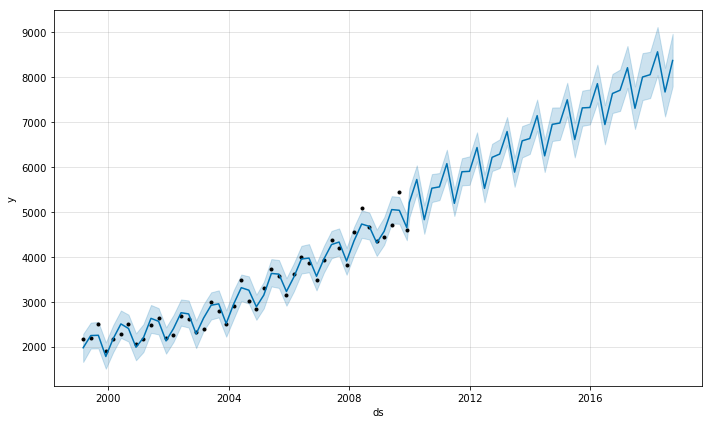

In [10]:
fc1.plot(forecast, uncertainty= True)

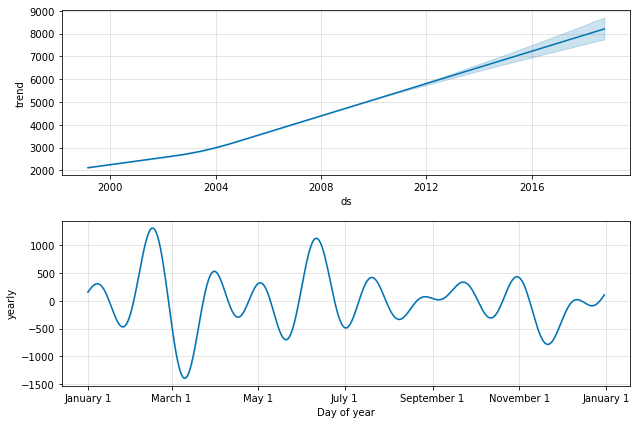

In [11]:
fc1.plot_components(forecast)

In [12]:
final_df = pd.merge(forecast1,df,on='ds',how='inner')
final_df.head()

,ds,yhat,y
0,1999-02-28,1976.114382,2177
1,1999-05-31,2247.145975,2182
2,1999-08-31,2253.435702,2505
3,1999-11-30,1781.758775,1913
4,2000-02-28,2180.986084,2162


In [13]:
np.round(metrics.mean_absolute_error(final_df.yhat,final_df.y),0)

120.0

In [14]:
# Taking log transformation
df.y = np.log(df.y)
df.head(5)

,ds,y
0,1999-02-28,7.685703
1,1999-05-31,7.687997
2,1999-08-31,7.826044
3,1999-11-30,7.556428
4,2000-02-28,7.678789


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


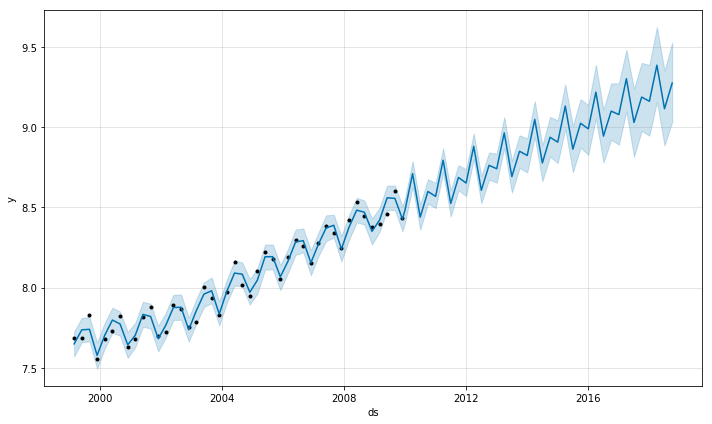

In [15]:
fc2 = Prophet(interval_width=0.95)
fc2.fit(df)
forecast_periods = fc2.make_future_dataframe(periods = 36, include_history= True, freq="Q")
forecast_periods
forecast = fc2.predict(forecast_periods)
forecast2 = forecast.loc[:,['ds','yhat']]
forecast2.head()
fc2.plot(forecast, uncertainty= True)

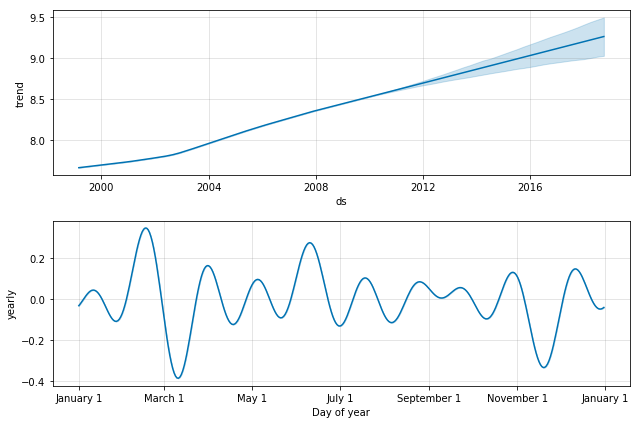

In [16]:
fc2.plot_components(forecast)

In [17]:
final_df2 = pd.merge(forecast2,df,on='ds',how='inner')
final_df2.head()

,ds,yhat,y
0,1999-02-28,7.649003,7.685703
1,1999-05-31,7.736763,7.687997
2,1999-08-31,7.739862,7.826044
3,1999-11-30,7.577569,7.556428
4,2000-02-28,7.701073,7.678789


In [18]:
# Scaling back the variables
final_df2.yhat = np.e**(final_df2.yhat)
final_df2.y = np.e**(final_df2.y)
final_df2.head()

,ds,yhat,y
0,1999-02-28,2098.553227,2177.0
1,1999-05-31,2291.043196,2182.0
2,1999-08-31,2298.154111,2505.0
3,1999-11-30,1953.873927,1913.0
4,2000-02-28,2210.717770,2162.0


#### MAE got reduced after doing log transformation of dependent variable

In [19]:
np.round(metrics.mean_absolute_error(final_df2.yhat,final_df2.y),0)

108.0

In [20]:
final_df2.tail()

,ds,yhat,y
39,2008-11-30,4232.544310,4340.0
40,2009-02-28,4535.526373,4440.0
41,2009-05-31,5215.816328,4713.0
42,2009-08-31,5196.116756,5432.0
43,2009-11-30,4564.899136,4590.0


#### Forecasting for next 36 months with 95% confidence interval

In [21]:
forecast2 = forecast.loc[44:,['ds','yhat','yhat_lower','yhat_upper']]
forecast2.yhat = np.e**(forecast2.yhat)
forecast2.yhat_lower = np.e**(forecast2.yhat_lower)
forecast2.yhat_upper = np.e**(forecast2.yhat_upper)
np.round(forecast2,0)

,ds,yhat,yhat_lower,yhat_upper
44,2009-12-31,4843.0,4479.0,5205.0
45,2010-03-31,6062.0,5586.0,6549.0
46,2010-06-30,4623.0,4272.0,4995.0
47,2010-09-30,5425.0,5030.0,5856.0
48,2010-12-31,5262.0,4892.0,5718.0
49,2011-03-31,6589.0,6105.0,7104.0
50,2011-06-30,5036.0,4638.0,5467.0
51,2011-09-30,5920.0,5463.0,6390.0
52,2011-12-31,5718.0,5273.0,6231.0
53,2012-03-31,7186.0,6645.0,7792.0


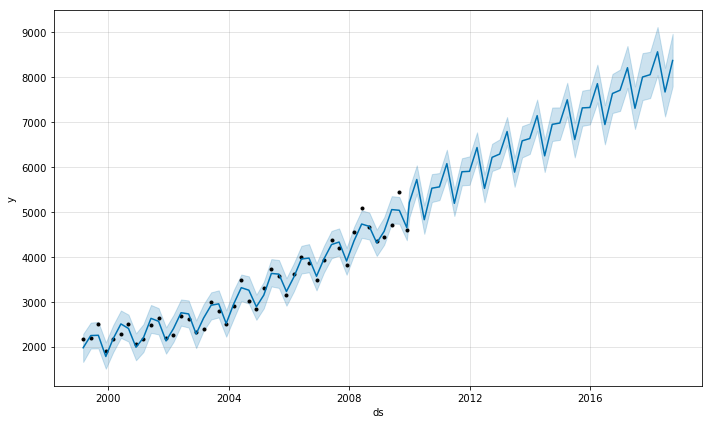

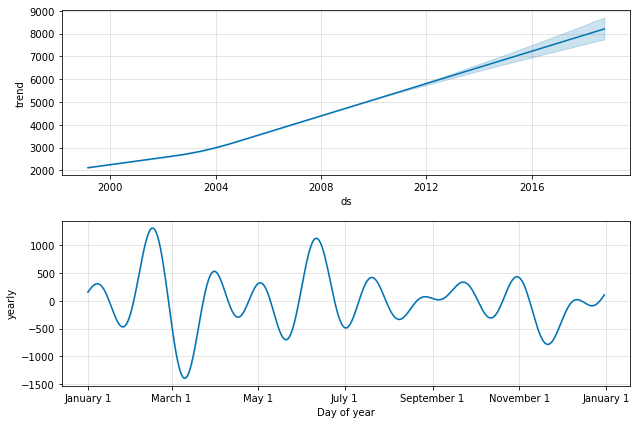

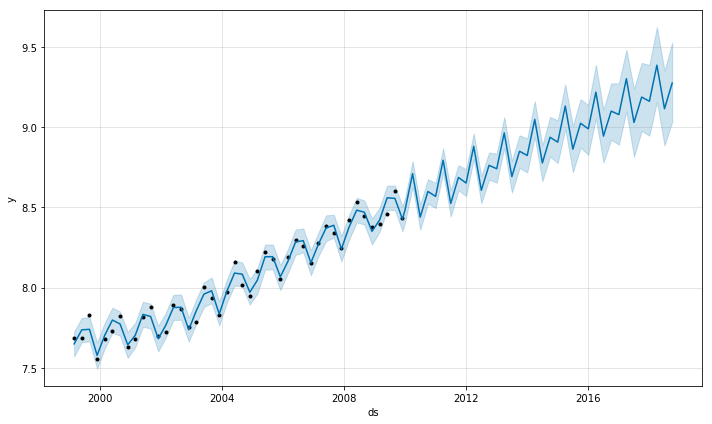

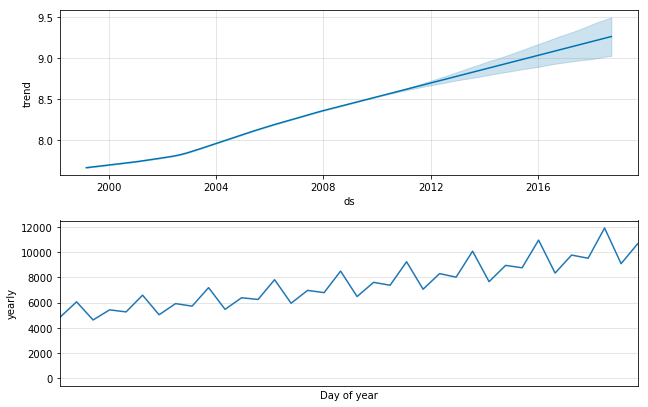

In [22]:
sns.tsplot(forecast2.yhat)
plt.show()